# Ames Housing ML Challenge


Laura Elliott
group SurrealEstates


-- 0.12469 in Kaggle

In [1]:
###### Importing data and loading packages

import pandas as pd
import numpy as np

import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 
%matplotlib inline

from sklearn.linear_model import LinearRegression, HuberRegressor


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
### Reference
#https://www.kaggle.com/vikassingh1996/

#comprehensive-data-preprocessing-and-modeling

# 1. EDA

In [3]:
### Checking Dimensions of datasets

print('Dimensions of train data:', train.shape)
print('Dimensions of test data:', test.shape)

Dimensions of train data: (1460, 81)
Dimensions of test data: (1459, 80)


### Looking at the column values in the train dataset

In [4]:
train.columns.values


array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

## Exploring Relationships

### Correlation heatmap for all Continuous variables

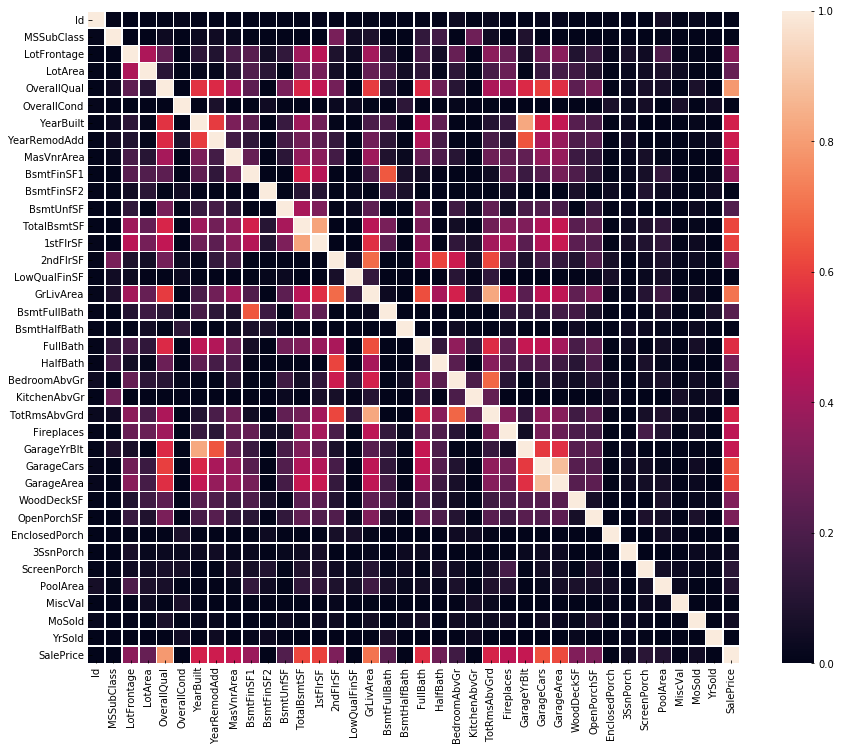

In [5]:
corr = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

###  Top 10 Correlations

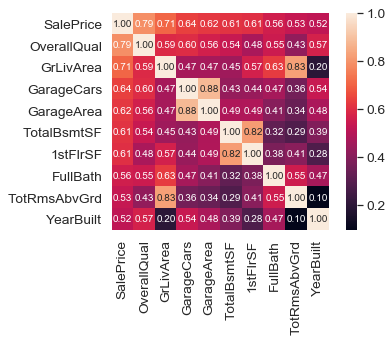

In [6]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


#### Highest Correlations seem to be: 
   - Overall Quality
   - Great Living Area
   - Garage Cars
   - Garage Area
   - Total Basement SF
   - First Floor SF
   - Full Bathrooms
   - Total Rooms above ground
   - Year Built

# Linearity and Remove Outliers :Top Correlations

Outliers were removed based on IQR and which produced the best model.

#### 1stFlrSF vs. Sale Price

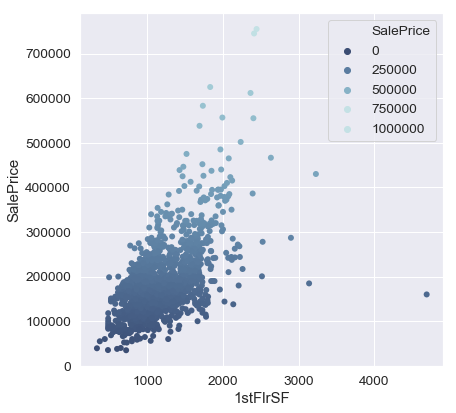

In [7]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="1stFlrSF", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [8]:
threshold = 2000

train = train[train.loc[:,'1stFlrSF'] < threshold]


##### GrLivArea vs. Sale Price

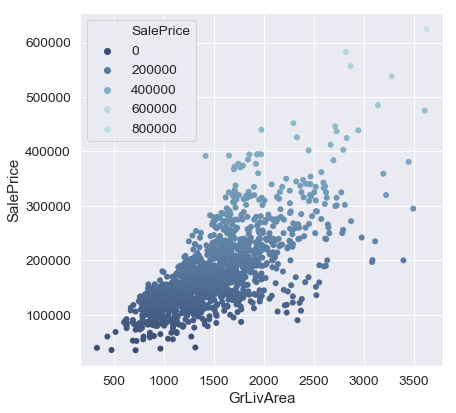

In [9]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="GrLivArea", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [10]:
threshold = 2500

train = train[train.loc[:,'GrLivArea'] < threshold]




##### Garage Area vs. SalePrice

There was a very large number of 0 observations, Meaning that there is no garage. I eliminated these because they do neither add nor subtract anything from the analysis.

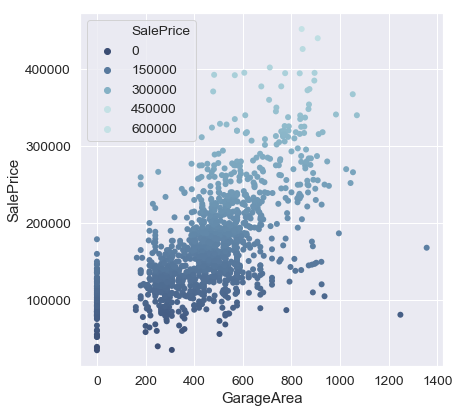

In [11]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="GarageArea", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [12]:
threshold = 1000

train = train[train.loc[:,'GarageArea'] < threshold]

##### Total Basement SF vs. SalePrice

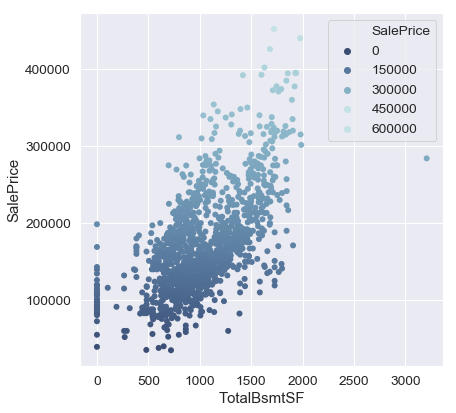

In [13]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="TotalBsmtSF", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [14]:
threshold = 2000

train = train[train.loc[:,'TotalBsmtSF'] < threshold]


##### Total Rooms Above Ground vs. SalePrice

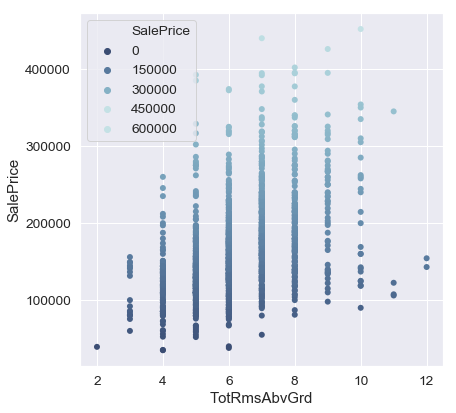

In [15]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="TotRmsAbvGrd", y="SalePrice",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [16]:
threshold = 14

train = train[train.loc[:,'TotRmsAbvGrd'] < threshold]

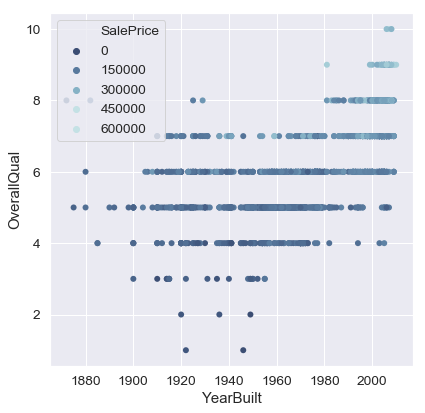

In [17]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="YearBuilt", y="OverallQual",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

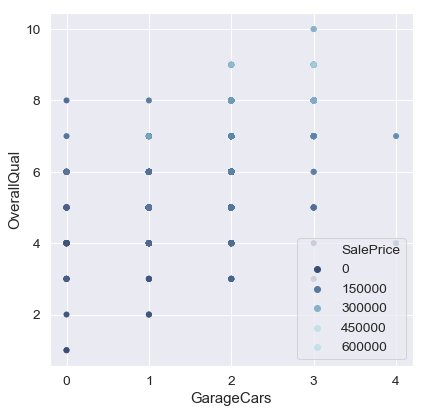

In [18]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="GarageCars", y="OverallQual",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

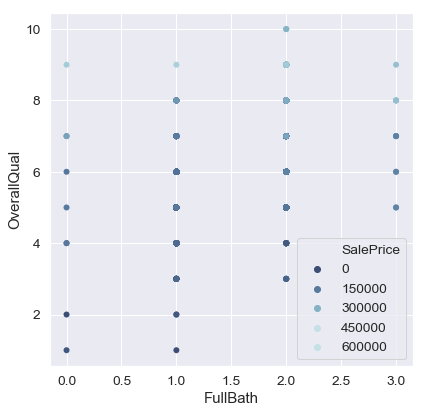

In [19]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="FullBath", y="OverallQual",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

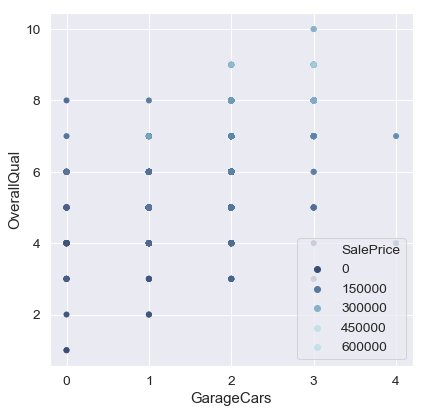

In [20]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="GarageCars", y="OverallQual",
                hue="SalePrice",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

## 2. Missing Variables

In [21]:
###### Combining Data
ntrain = train.shape[0]
ntest = test.shape[0]

housing_merge = pd.merge(train, test, how='outer').reset_index(drop=True)

##### Extracting 'SalePrice' and 'ID'
### ID is extracted so it is not transformed during the normalization process
y_sale = pd.DataFrame(train['SalePrice'])
id_temp = pd.DataFrame(housing_merge['Id'])


housing_merge.drop(['Id'], axis=1, inplace=True)
housing_merge.drop(['SalePrice'], axis=1, inplace=True)

print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
#print("Combined dataset size is : {}".format(housing_merge.shape))

Train data size is : (1353, 81)
Test data size is : (1459, 80)


In [22]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
total = housing_merge.isna().sum()/housing_merge.isna().count()
sum=housing_merge.isna().sum()

missing=pd.concat([total,sum],axis=1,keys=['Perc','Sum']).sort_values(by='Perc',ascending=False)

colstodrop = missing[missing['Sum']>0].index

missing[missing['Sum']>0]

,Perc,Sum
PoolQC,0.997866,2806
MiscFeature,0.964083,2711
Alley,0.931366,2619
Fence,0.802987,2258
FireplaceQu,0.501778,1411
LotFrontage,0.166430,468
GarageYrBlt,0.055832,157
GarageFinish,0.055832,157
GarageQual,0.055832,157
GarageCond,0.055832,157


There is very high missing in PoolQC, MiscFeature, Alley,and FenceQu.

PoolQC and FireplacQu will be dropped here because I do not need them for feature engineering later


In [24]:
housing_merge.drop(['PoolQC', 'FireplaceQu'], axis=1, inplace=True)

#### Converting categorical variables in the merged dataset

In [25]:
housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
             ]] = housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
                               ]].astype('object')

### Imputation

#### Imputing mode for MSZoning, Electrical, Utilites, Exterior1st/2nd, KitchenQual, Functional, SaleType, TotalSF

In [26]:
## MSZoning
housing_merge['MSZoning']=housing_merge['MSZoning'].fillna('RL')
print('MSZoning unique Values: ', train['MSZoning'].unique())

MSZoning unique Values:  ['RL' 'RM' 'C (all)' 'FV' 'RH']


In [27]:
## Electrical
housing_merge['Electrical']=housing_merge['Electrical'].fillna('SBrkr')
print('Electrical unique values: ', housing_merge['Electrical'].unique())

Electrical unique values:  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']


In [28]:
## Utilities
housing_merge['Utilities']=housing_merge['Utilities'].fillna('AllPub')
print('Utility unique values: ', housing_merge['Utilities'].unique())

Utility unique values:  ['AllPub' 'NoSeWa']


In [29]:
## Exterior1st
housing_merge['Exterior1st']=housing_merge['Exterior1st'].fillna('VinylSd')
print('Exterior1st unique values: ', housing_merge['Exterior1st'].unique())

Exterior1st unique values:  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


In [30]:
## Exterior2nd
housing_merge['Exterior2nd']=housing_merge['Exterior2nd'].fillna('VinylSd')
print('Exterior2nd unique values: ', housing_merge['Exterior2nd'].unique())

Exterior2nd unique values:  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Other'
 'Stone' 'CBlock']


In [31]:

## KitchenQual
housing_merge['KitchenQual']=housing_merge['KitchenQual'].fillna('TA')
print('Kitchen Quality unique values: ', housing_merge['KitchenQual'].unique())

Kitchen Quality unique values:  ['Gd' 'TA' 'Ex' 'Fa']


In [32]:
#Functional
housing_merge['Functional']=housing_merge['Functional'].fillna('Typ')
print('Functional unique values: ', housing_merge['Functional'].unique())

Functional unique values:  ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


In [33]:
##SaleType
housing_merge['SaleType']=housing_merge['SaleType'].fillna('WD')
print('SaleType unique values: ', housing_merge['SaleType'].unique())


SaleType unique values:  ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


  #### Imputing Random for Lot Frontage,  MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, GarageArea

In [34]:
# LotFrontage

housing_merge['LotFrontage'] = housing_merge['LotFrontage'].apply(lambda x: np.random.choice(housing_merge['LotFrontage'].dropna().values) if np.isnan(x) else x)
#fill_with_random(housing_merge, housing_merge['LotFrontage'])
#.fillna(housing_merge['LotFrontage'].mean(), inplace=True)
print('LotFrontage missing:', housing_merge['LotFrontage'].isna().sum())


LotFrontage missing: 0


In [35]:
# MasVnrArea

housing_merge['MasVnrArea'] = housing_merge['MasVnrArea'].apply(lambda x: np.random.choice(housing_merge['MasVnrArea'].dropna().values) if np.isnan(x) else x)

#housing_merge['MasVnrArea'].fillna(housing_merge['MasVnrArea'].mean(), inplace=True)
print('MasVnrArea missing:', housing_merge['MasVnrArea'].isna().sum())


MasVnrArea missing: 0


In [36]:
# BsmtFinSF1
#housing_merge['BsmtFinSF1'].fillna(housing_merge['BsmtFinSF1'].mean(), inplace=True)

housing_merge['BsmtFinSF1'] = housing_merge['BsmtFinSF1'].apply(lambda x: np.random.choice(housing_merge['BsmtFinSF1'].dropna().values) if np.isnan(x) else x)
print('BsmtFinSF1 missing:', housing_merge['BsmtFinSF1'].isna().sum())


BsmtFinSF1 missing: 0


In [37]:
# BsmtFinSF2
#housing_merge['BsmtFinSF2'].fillna(housing_merge['BsmtFinSF2'].mean(), inplace=True)
housing_merge['BsmtFinSF2'] = housing_merge['BsmtFinSF2'].apply(lambda x: np.random.choice(housing_merge['BsmtFinSF2'].dropna().values) if np.isnan(x) else x)
print('BsmtFinSF2 missing:', housing_merge['BsmtFinSF2'].isna().sum())


BsmtFinSF2 missing: 0


In [38]:
# BsmtUnfSF
#housing_merge['BsmtUnfSF'].fillna(housing_merge['BsmtUnfSF'].mean(), inplace=True)
housing_merge['BsmtUnfSF'] = housing_merge['BsmtUnfSF'].apply(lambda x: np.random.choice(housing_merge['BsmtUnfSF'].dropna().values) if np.isnan(x) else x)
print('BsmtunfSF missing:', housing_merge['BsmtUnfSF'].isna().sum())


BsmtunfSF missing: 0


In [39]:
# TotalBasmtSF
#housing_merge['TotalBsmtSF'].fillna(housing_merge['TotalBsmtSF'].mean(), inplace=True)

housing_merge['TotalBsmtSF'] = housing_merge['TotalBsmtSF'].apply(lambda x: np.random.choice(housing_merge['TotalBsmtSF'].dropna().values) if np.isnan(x) else x)
print('TotalBsmtSF missing:', housing_merge['TotalBsmtSF'].isna().sum())



TotalBsmtSF missing: 0


In [40]:
# GarageArea
#housing_merge['GarageArea'].fillna(housing_merge['GarageArea'].mean(), inplace=True)

housing_merge['GarageArea'] = housing_merge['GarageArea'].apply(lambda x: np.random.choice(housing_merge['GarageArea'].dropna().values) if np.isnan(x) else x)
print('GarageArea missing:', housing_merge['GarageArea'].isna().sum())



GarageArea missing: 0


In [41]:
# Total Bsmt Sf
#housing_merge['TotalBsmtSF'].fillna(housing_merge['TotalBsmtSF'].mean(), inplace=True)
housing_merge['TotalBsmtSF'] = housing_merge['TotalBsmtSF'].apply(lambda x: np.random.choice(housing_merge['TotalBsmtSF'].dropna().values) if np.isnan(x) else x)
print('TotalBsmtSF missing:', housing_merge['TotalBsmtSF'].isna().sum())




TotalBsmtSF missing: 0


#### Imputing median for Bsmt FullBath, BsmtHalfBath, GarageCars, GarageYrBlt

In [42]:
##BedroomAbvGr
housing_merge['BedroomAbvGr'].fillna(housing_merge['BedroomAbvGr'].median(),inplace = True)
print('BedroomAbvGr missing: ', housing_merge['BedroomAbvGr'].isna().sum())

BedroomAbvGr missing:  0


In [43]:
# BsmtFullBath
housing_merge['BsmtFullBath'].fillna(housing_merge['BsmtFullBath'].median(), inplace=True)
print('BsmtFullBath missing:', housing_merge['BsmtFullBath'].isna().sum())



BsmtFullBath missing: 0


In [44]:
#BsmtHalfBath
housing_merge['BsmtHalfBath'].fillna(housing_merge['BsmtHalfBath'].median(), inplace=True)
print('BsmtHalfBath missing:', housing_merge['BsmtHalfBath'].isna().sum())

BsmtHalfBath missing: 0


In [45]:
#Garage Cars
housing_merge['GarageCars'].fillna(housing_merge['GarageCars'].median(), inplace=True)
print('GarageCars missing:', housing_merge['GarageCars'].isna().sum())

GarageCars missing: 0


In [46]:
#GarageYrBlt
housing_merge['GarageYrBlt'].fillna(housing_merge['GarageYrBlt'].median(), inplace=True)
print('GarageYrBlt missing:', housing_merge['GarageYrBlt'].isna().sum())

GarageYrBlt missing: 0


In [47]:
#Fireplaces
housing_merge['Fireplaces'].fillna(housing_merge['Fireplaces'].median(), inplace=True)
print('Fireplaces missing:', housing_merge['Fireplaces'].isna().sum())

Fireplaces missing: 0


In [48]:
#FullBath
housing_merge['FullBath'].fillna(housing_merge['FullBath'].median(), inplace=True)
print('FullBath missing:', housing_merge['FullBath'].isna().sum())

FullBath missing: 0


In [49]:
#HalfBath 
housing_merge['HalfBath'].fillna(housing_merge['HalfBath'].median(), inplace=True)
print('HalfBath  missing:', housing_merge['HalfBath'].isna().sum())

HalfBath  missing: 0


In [50]:

#KitchenAbvGr 
housing_merge['KitchenAbvGr'].fillna(housing_merge['KitchenAbvGr'].median(), inplace=True)
print('KitchenAbvGr  missing:', housing_merge['KitchenAbvGr'].isna().sum())

KitchenAbvGr  missing: 0


In [51]:
#MSSubClass 
housing_merge['MSSubClass'].fillna(housing_merge['MSSubClass'].median(), inplace=True)
print('MSSubClass  missing:', housing_merge['MSSubClass'].isna().sum())

MSSubClass  missing: 0


In [52]:
#MoSold 
housing_merge['MoSold'].fillna(housing_merge['MoSold'].median(), inplace=True)
print('MoSold missing:', housing_merge['MoSold'].isna().sum())

MoSold missing: 0


In [53]:
#OverallCond 
housing_merge['OverallCond'].fillna(housing_merge['OverallCond'].median(), inplace=True)
print('OverallCond missing:', housing_merge['OverallCond'].isna().sum())

OverallCond missing: 0


In [54]:
#OverallQual
housing_merge['OverallQual'].fillna(housing_merge['OverallQual'].median(), inplace=True)
print('OverallQual missing:', housing_merge['OverallQual'].isna().sum())

OverallQual missing: 0


In [55]:
#YrSold
housing_merge['YrSold'].fillna(housing_merge['YrSold'].median(), inplace=True)
print('YrSold missing:', housing_merge['YrSold'].isna().sum())

YrSold missing: 0


In [56]:
housing_merge.LotArea.isna().sum()

0

#### Imputing 'None' for missing values where NaN is meaningful, i.e. PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageCOnd, GarageFinish, GarageQual, BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1, MasVnrType

In [57]:
impute_none = housing_merge.loc[:, [ 'MiscFeature', 'Alley', 'Fence',
                                    'GarageType', 'GarageCond','GarageFinish','GarageQual',
                                    'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1',
                                    'MasVnrType']]
for i in impute_none.columns:
    housing_merge[i].fillna('None', inplace = True)

In [58]:
#Check
missing_columns = housing_merge.columns[housing_merge.isnull().any()].values
missing_columns = len(housing_merge) - housing_merge.loc[:, np.sum(housing_merge.isnull())>0].count()
missing_columns

Series([], dtype: int64)

In [59]:
housing_merge.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64


In [60]:
housing_merge.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch 

## 4.0 Feature Engineering

Creating new features from old to reduce dimensionality a little

In [61]:
######### New Features

housing_merge['TotalSF'] = (housing_merge['BsmtFinSF1'] + housing_merge['BsmtFinSF2'] 
                           + housing_merge['1stFlrSF'] + housing_merge['2ndFlrSF'])



In [62]:

housing_merge['TotalBathrooms'] = (housing_merge['FullBath'] + (0.5*housing_merge['HalfBath']) +
                              housing_merge['BsmtFullBath'] + (0.5*housing_merge['BsmtHalfBath']))



In [63]:
housing_merge['TotalPorchSF'] = (housing_merge['OpenPorchSF'] + housing_merge['3SsnPorch'] +
                             housing_merge['EnclosedPorch'] + housing_merge['ScreenPorch'] +
                              housing_merge['WoodDeckSF'])

In [64]:
housing_merge.isna().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
                 ..
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0


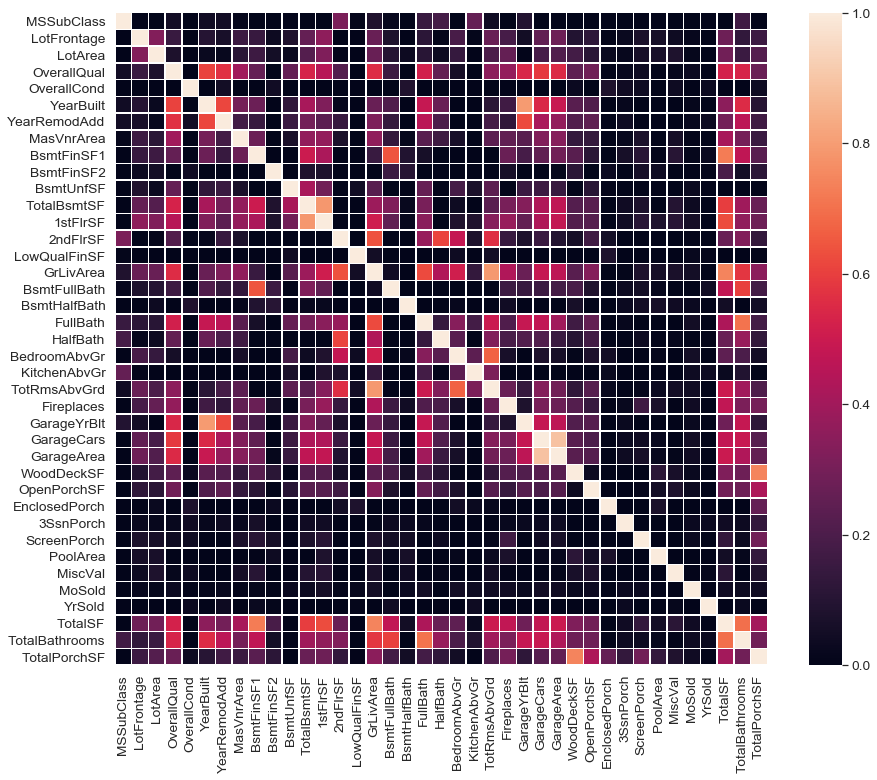

In [65]:
corr = housing_merge.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

Dropping Features Used to make the new ones 

In [66]:
housing_merge.drop(['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath'], axis=1, inplace=True)

In [67]:
housing_merge.drop(['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF'], axis=1, inplace=True)

In [68]:
housing_merge.drop(['3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF', 'OpenPorchSF'], axis=1, inplace=True)

Based on the correlation matrix above will drop GarageCars and LotFrontage because they are highly correlated with other features

In [69]:
housing_merge.drop(['GarageCars'], axis=1, inplace=True)

In [70]:
housing_merge.drop(['LotFrontage'], axis=1, inplace=True)

In [71]:
numeric_cols = housing_merge.dtypes[housing_merge.dtypes != "object"].index

In [72]:
categori_cols = housing_merge.dtypes[housing_merge.dtypes == object]

In [73]:
housing_merge.shape

(2812, 66)

In [74]:
housing_merge.MiscFeature.unique()

array(['None', 'Shed', 'Gar2', 'Othr'], dtype=object)

Making new binary variables from old ones

In [75]:
housing_merge['Pool'] = housing_merge['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['Has2flor'] = housing_merge['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasGarage'] = housing_merge['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasBsmt'] = housing_merge['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasFireplace'] = housing_merge['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

#### Using Label Encoder to encode Categorical Values

In [76]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import array
from numpy import argmax 


#reference:https://www.kaggle.com/erick5/predicting-house-prices-with-machine-learning

cols = ( 'BldgType', 'BsmtCond', 'BsmtExposure','Fence', 'MiscFeature', 'Alley',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType',
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities')


In [77]:
#np.where(np.isnan(housing_merge))

In [78]:
##### process and encode to make it easier for the machine learning algorithm
### to read cat var
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(housing_merge[c].values))
    housing_merge[c] = lbl.transform(list(housing_merge[c].values))
    
print('Shape housing_merge: {}'.format(housing_merge.shape))

Shape housing_merge: (2812, 71)


In [79]:
### hanging back to category

housing_merge[['BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities','Fence', 'MiscFeature', 'Alley']] = housing_merge[['BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd',  'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities','Fence', 'MiscFeature', 'Alley']].astype('category')


In [80]:
housing_merge = pd.get_dummies(housing_merge, drop_first = True)

## 5.0 Checking Assumptions: Normality

#### Continuous Vars

In [81]:
num_housing_merge = housing_merge.select_dtypes(include = ['int64', 'float64'])
display(num_housing_merge.head())
display(num_housing_merge.columns.values)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,MoSold,YrSold,TotalSF,TotalBathrooms,TotalPorchSF,Pool,Has2flor,hasGarage,hasBsmt,hasFireplace
0,60,8450,7,5,2003,2003,196.0,150.0,856.0,854,...,2,2008,2416.0,3.5,61,0,1,1,1,0
1,20,9600,6,8,1976,1976,0.0,284.0,1262.0,0,...,5,2007,2240.0,2.5,298,0,0,1,1,1
2,60,11250,7,5,2001,2002,162.0,434.0,920.0,866,...,9,2008,2272.0,3.5,42,0,1,1,1,1
3,70,9550,7,5,1915,1970,0.0,540.0,756.0,756,...,2,2006,1933.0,2.0,307,0,1,1,1,1
4,60,14260,8,5,2000,2000,350.0,490.0,1145.0,1053,...,12,2008,2853.0,3.5,276,0,1,1,1,1


array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'TotalSF',
       'TotalBathrooms', 'TotalPorchSF', 'Pool', 'Has2flor', 'hasGarage',
       'hasBsmt', 'hasFireplace'], dtype=object)

In [82]:
train_num_std = [col for col in num_housing_merge if abs(housing_merge[col].skew()) <= 1]
train_num_yjt = [col for col in num_housing_merge if abs(housing_merge[col].skew()) > 1]

In [83]:
########### Transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

### Num
scaler = StandardScaler().fit(housing_merge[train_num_std].values)
housing_merge[train_num_std] = scaler.transform(housing_merge[train_num_std].values)

### power transform
pt = PowerTransformer().fit(housing_merge[train_num_yjt].values)
housing_merge[train_num_yjt] = pt.transform(housing_merge[train_num_yjt].values)


/Users/lauraelliott/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2798: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


#### Sale Price

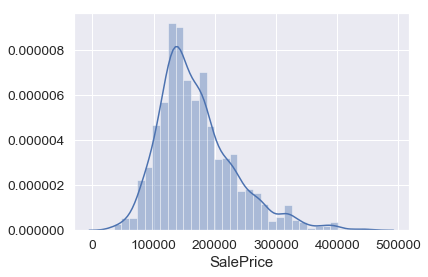

In [84]:
sns.distplot(y_sale['SalePrice'])

In [85]:
y_sale = np.log1p(y_sale)

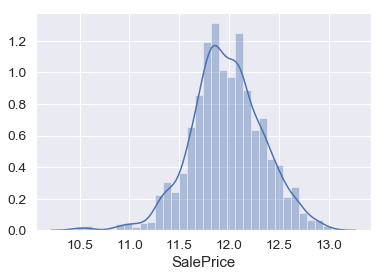

In [86]:
sns.distplot(y_sale['SalePrice'])


## 6.0 To CSV

In [87]:
housing_merge = pd.concat([housing_merge, id_temp], axis=1)

In [88]:
print(housing_merge.shape)

(2812, 243)


In [89]:
print(y_sale.shape)

(1353, 1)


### To CSV


In [90]:
housing_train = pd.DataFrame(housing_merge.iloc[0:1353, :])
housing_test = pd.DataFrame(housing_merge.iloc[1353:,:])

y_train = pd.DataFrame( y_sale)

In [91]:
housing_train.to_csv('housing_train.csv', index = False)
housing_test.to_csv('housing_test.csv', index = False)



y_train.to_csv('y_housing.csv', index = False)